In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [14]:
import squints as sq

## Data loading

In [6]:
train_o = pd.read_csv("data/train.csv")
test_o = pd.read_csv("data/test.csv")

In [7]:
train_o.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,1,6,14,6,6,1,1,10,2,1
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,6,11,1,6,1,4,4,1,13,0
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,1,4,21,12,1,16,10,4,9,0
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,13,12,2,4,2,7,1,2,11,1
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,12,2,2,4,1,3,1,11,15,1


In [9]:
prepr = lambda data:sq.logize(sq.fillize(sq.relize(sq.deidize(data))))

ftrainX, ftrainY = prepr(train_o.drop("y",axis=1)), train_o["y"]
ftrainX, ftestX = sq.normall([ftrainX, prepr(test_o)])

trainX, valX, trainY, valY = sq.splitize(train_o)
trainX, valX, testX = sq.normall([prepr(trainX), prepr(valX), prepr(test_o)])

In [10]:
trainX.head()

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,nans
301952,0.383431,0.385877,0.693147,0.693147,1.098612,0.034539,0.0,0.182322,0.182322,0.182322,...,1.386294,1.386294,0.693147,0.693147,2.079442,1.098612,2.079442,1.098612,1.791759,False
581967,1.454753,1.457199,0.000000,0.000000,0.000000,0.034539,0.0,0.182322,0.182322,0.182322,...,0.693147,1.791759,1.386294,1.098612,1.098612,2.772589,2.197225,2.197225,2.197225,True
202571,-0.766162,-0.764939,1.098612,0.693147,1.386294,0.884860,0.0,0.182322,0.182322,0.182322,...,1.098612,0.693147,0.693147,1.791759,2.197225,2.944439,2.397895,2.484907,3.526361,False
320300,1.202821,1.200375,1.609438,1.609438,2.197225,0.034539,0.4,0.470004,0.336472,0.182322,...,1.098612,1.609438,0.693147,0.693147,1.386294,2.708050,0.693147,2.197225,2.772589,False
324751,1.058511,1.057288,0.000000,1.791759,1.791759,-2.091263,0.2,0.336472,0.182322,0.182322,...,2.708050,1.386294,1.945910,2.197225,0.693147,1.098612,1.098612,0.693147,0.693147,False


## AdaBoost

In [11]:
import sklearn.ensemble

ada = sklearn.ensemble.AdaBoostClassifier()
ada.fit(trainX, trainY)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

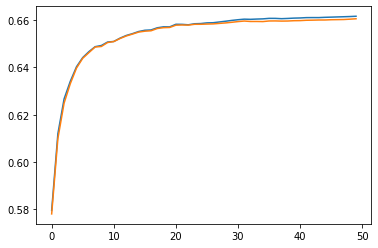

In [12]:
# plot scores
s_train = []
for p in ada.staged_predict_proba(trainX):
    s_train.append(sklearn.metrics.roc_auc_score(trainY, p[:,1]))
s_val = []
for p in ada.staged_predict_proba(valX):
    s_val.append(sklearn.metrics.roc_auc_score(valY, p[:,1]))

plt.plot(s_train)
plt.plot(s_val)

0.6605844752233107

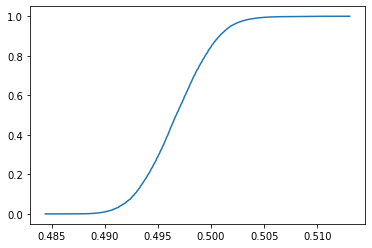

In [22]:
p = ada.predict_proba(valX)[:,1]
sq.ecdf(p)
sklearn.metrics.roc_auc_score(valY, p)

## Predict

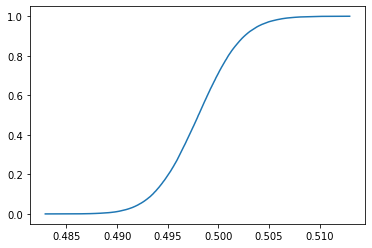

In [24]:
ada = sklearn.ensemble.AdaBoostClassifier()
ada.fit(ftrainX, ftrainY)
p = ada.predict_proba(ftestX)[:,1]
sq.ecdf(p)

In [27]:
sq.write(test_o["id"], p, "adaboost-test.csv")